In [ ]:
kos = '../out/rev_sequencing_kos.tsv'

In [2]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')

plt.rc('font', size=12)

In [3]:
import numpy as np
import pandas as pd

In [4]:
d = {'S288C': 'S288C',
     'Y55': 'Y55',
     'UWOPS87': 'UWOP',
     'YPS606': 'YPS'}

In [5]:
inter = pd.read_csv(kos, sep='\t')

In [6]:
inter['size'] = inter['stop'] - inter['start']

In [7]:
inter = inter[inter['size'] > 100]

In [8]:
ci = inter.groupby(['target', 'strain'])['set'].nunique()
ci = ci[ci == 2]

In [9]:
inter = inter.set_index(['target', 'strain']).loc[ci.index].reset_index()

In [10]:
niter = inter.groupby(['set', 'strain', 'gene'])['sample'].count().loc['new']
oiter = inter.groupby(['set', 'strain', 'gene'])['sample'].count().loc['original']

In [11]:
m = niter.to_frame().join(oiter.to_frame(),
                          how='outer',
                          lsuffix='_new',
                          rsuffix='_original')
m[np.isnan(m)] = 0.0

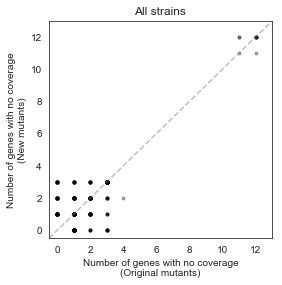

In [12]:
plt.figure(figsize=(4, 4))

plt.plot(m['sample_original'],
         m['sample_new'],
         'k.',
         alpha=0.3)
plt.plot([-0.5, 13],
         [-0.5, 13],
         '--',
         color='grey',
         alpha=0.5)

plt.xlabel('Number of genes with no coverage\n(Original mutants)')
plt.ylabel('Number of genes with no coverage\n(New mutants)')

plt.title('All strains')

plt.xlim(-0.5, 13)
plt.ylim(-0.5, 13)

plt.savefig('ko_sequencing.png',
            dpi=300, bbox_inches='tight',
            transparent=True)
plt.savefig('ko_sequencing.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

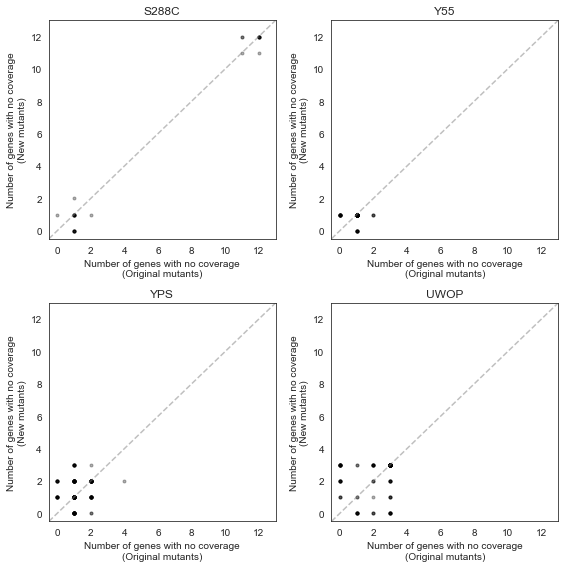

In [13]:
plt.figure(figsize=(8, 8))

for i, strain in enumerate(['S288C',
                            'Y55',
                            'YPS606',
                            'UWOPS87']):
    plt.subplot(2, 2, i+1)
    plt.plot(m.loc[strain]['sample_original'],
             m.loc[strain]['sample_new'],
             'k.',
             alpha=0.3,
             label='_')
    
    plt.xlabel('Number of genes with no coverage\n(Original mutants)')
    plt.ylabel('Number of genes with no coverage\n(New mutants)')

    plt.title(d[strain])
    
    plt.xlim(-0.5, 13)
    plt.ylim(-0.5, 13)
    
    plt.plot([-0.5, 13],
             [-0.5, 13],
             '--',
             color='grey',
             alpha=0.5)

plt.tight_layout()

plt.savefig('ko_sequencing_all.png',
            dpi=300, bbox_inches='tight',
            transparent=True)
plt.savefig('ko_sequencing_all.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);